In [507]:
using StatsPlots, Plots
using Distributions, ARFIMA
using Statistics, StatsBase
using CSV, DataFrames
using Dates
using LsqFit

# Micro

In [31]:
File=CSV.read("Microsoft_Stock.csv", DataFrame);

In [32]:
N=length(File[:,:Date])

1511

In [66]:
file=File[:,[:Close]]
file[:,:time]=[i for i in 1:N];

In [67]:
file
X=file[:,:Close];

In [68]:
γ(X,h)=begin
    n=length(X)
    x=mean(X)
    sum(@. (X[h+1:end]-x)*(X[1:n-h]-x) )/n
end

γ (generic function with 1 method)

In [69]:
γ₀=γ(X,0)
γ₁=γ(X,1)
Γ=[γ₀ γ₁;
   γ₁ γ₀]
γ₂=[γ₁, γ(X,2)];

In [70]:
Φ=inv(Γ)*γ₂

2-element Vector{Float64}:
 0.9048760483745184
 0.09238264441938782

In [71]:
A(p)=[γ(X,abs(i-j)) for i in 1:p, j in 1:p]

A (generic function with 1 method)

In [72]:
A(2)

2×2 Matrix{Float64}:
 3213.02  3203.32
 3203.32  3213.02

In [73]:
b(p)=[γ(X,i) for i in 1:p]

b (generic function with 1 method)

In [74]:
φ(p)=inv(A(p))*b(p)

φ (generic function with 1 method)

In [109]:
σ(p)=begin
    a=φ(p)
    c=b(p)
    γ(X,0)-sum(a[i]*c[i] for i in 1:p)
end

σ (generic function with 1 method)

In [115]:
σ(200)

17.65873632382136

In [119]:
FPE=[σ(p)*(N+p)/(N-p) for p in 1:100]

100-element Vector{Float64}:
 19.405159490614775
 19.2650279921643
 19.2759468510785
 19.293822499628053
 19.30931586138482
 19.332921292232175
 19.350851678725054
 19.356318516582075
 19.32317799231952
 19.322579864567594
 19.34623264190059
 19.368623890089125
 19.39126497581461
  ⋮
 20.899795040944817
 20.927475834173794
 20.954381442084262
 20.981820237741157
 21.00802529176662
 21.03537637595525
 21.055218558765816
 21.08106666083194
 21.10530938773287
 21.096988270367795
 21.115490446927254
 21.13935752223546

In [121]:
(1:100)[argmin(FPE)]

2

In [122]:
φ(2)

2-element Vector{Float64}:
 0.9048760483745184
 0.09238264441938782

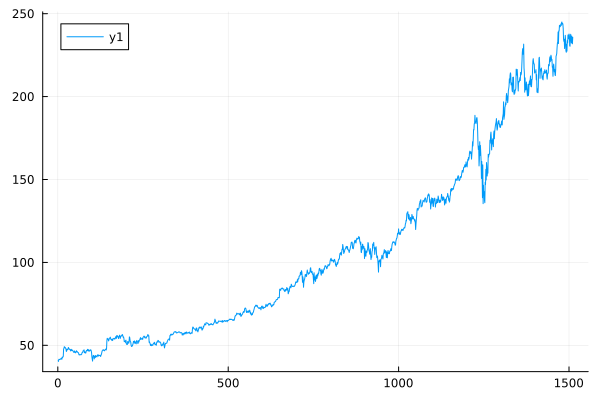

In [123]:
plot(X)

# Weather

In [148]:
File=CSV.read("testset.csv", DataFrame);

In [149]:
File[:,[:datetime_utc,:tempm]];

In [157]:
Date("20200101", "yyyymmdd")

2020-01-01

In [167]:
File[:,:temp]=File[:,:tempm];

In [158]:
File[1,:datetime_utc]

"19961101-11:00"

In [165]:
Date(File[2,:datetime_utc][1:8], "yyyymmdd")

1996-11-01

In [399]:
File=CSV.read("testset.csv", DataFrame);
file=File[:,[:datetime_utc]];

In [171]:
N=length(file[:,:temp])

100990

In [184]:
file[:,:Date]=[Date(File[i,:datetime_utc][1:8], "yyyymmdd") for i in 1:N];
file[:,:h]=[parse(Int,File[i,:datetime_utc][10:11]) for i in 1:N];

In [185]:
file

,temp,Date,h
,Int64?,Date,Int64
1,30,1996-11-01,11
2,28,1996-11-01,12
3,24,1996-11-01,13
4,24,1996-11-01,14
5,23,1996-11-01,16
6,21,1996-11-01,17
7,21,1996-11-01,18
8,21,1996-11-01,19
9,19,1996-11-01,20


In [192]:
[(file[i,:h]-file[i-1,:h])%24!=1 for i in 2:N]

100989-element Vector{Bool}:
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 1
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [199]:
[sum(file[:,:h].==i) for i in 0:23]

24-element Vector{Int64}:
 7109
 2624
 3012
 7240
 3009
 3029
 7137
 2955
 2979
 7154
 3056
 3078
 7140
 2893
 2486
 6981
 2541
 2544
 6990
 2554
 2542
 6964
 2509
 2464

In [201]:
maximum(ans)

7240

In [204]:
X=file[file[:,:h].==12,:];

In [233]:
X[868:875,:]

,temp,Date,h
,Int64?,Date,Int64
1,36,2000-08-08,12
2,35,2000-08-09,12
3,27,2000-08-10,12
4,29,2000-08-11,12
5,35,2000-08-27,12
6,33,2000-09-01,12
7,34,2000-09-02,12
8,27,2000-09-03,12


In [235]:
temp=Day.(File[File[:,:h]==3,:Date])

LoadError: ArgumentError: column name :h not found in the data frame; existing most similar names are: :hum

In [211]:
temp[2:end]-temp[1:end-1]

7139-element Vector{Dates.CompoundPeriod}:
 1 day
 1 day
 1 day
 2 days
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 ⋮
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 empty period
 1 day
 1 day

In [229]:
temp[2:end]-temp[1:end-1];

In [230]:
argmax(ans)

871

In [224]:
(temp[2:end]-temp[1:end-1]).!=Day(1)

7139-element BitVector:
 0
 0
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0

In [225]:
sum(ans)

1119

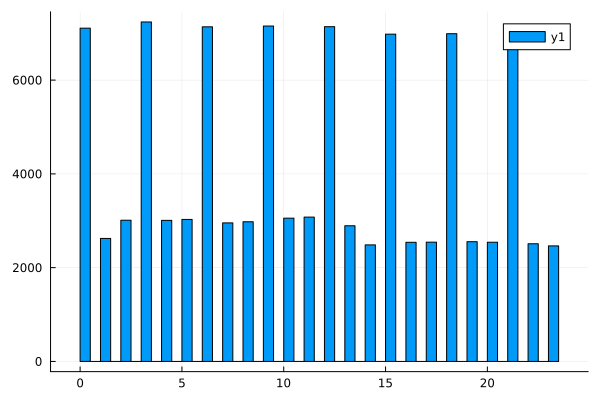

In [234]:
histogram(file[:,:h])

In [241]:
X

,temp,Date,h
,Int64?,Date,Int64
1,28,1996-11-01,12
2,27,1996-11-02,12
3,26,1996-11-03,12
4,25,1996-11-04,12
5,25,1996-11-06,12
6,25,1996-11-07,12
7,23,1996-11-08,12
8,25,1996-11-09,12
9,23,1996-11-10,12


In [237]:
temp=Day.(file[file[:,:h].==3,:Date])

7240-element Vector{Day}:
 2 days
 3 days
 4 days
 7 days
 8 days
 9 days
 10 days
 11 days
 12 days
 13 days
 15 days
 16 days
 17 days
 ⋮
 13 days
 14 days
 15 days
 16 days
 17 days
 18 days
 19 days
 20 days
 21 days
 22 days
 23 days
 24 days

In [238]:
temp[2:end]-temp[1:end-1]

7239-element Vector{Dates.CompoundPeriod}:
 1 day
 1 day
 3 days
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 2 days
 1 day
 1 day
 1 day
 ⋮
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day
 1 day

In [239]:
maximum(ans)

12 days

In [324]:
file

,temp,Date,h
,Int64?,Date,Int64
1,30,1996-11-01,11
2,28,1996-11-01,12
3,24,1996-11-01,13
4,24,1996-11-01,14
5,23,1996-11-01,16
6,21,1996-11-01,17
7,21,1996-11-01,18
8,21,1996-11-01,19
9,19,1996-11-01,20


true

In [398]:
X=file[temp]

LoadError: MethodError: no method matching getindex(::DataFrame, ::Vector{Day})
[0mClosest candidates are:
[0m  getindex(::DataFrame, ::AbstractVector{T}, [91m::Colon[39m) where T at C:\Users\Kacper\.julia\packages\DataFrames\3mEXm\src\dataframe\dataframe.jl:457
[0m  getindex(::DataFrame, ::AbstractVector{T}, [91m::Union{Colon, Regex, AbstractVector, All, Between, Cols, InvertedIndex}[39m) where T at C:\Users\Kacper\.julia\packages\DataFrames\3mEXm\src\dataframe\dataframe.jl:445
[0m  getindex(::DataFrame, ::AbstractVector, [91m::Union{AbstractString, Signed, Symbol, Unsigned}[39m) at C:\Users\Kacper\.julia\packages\DataFrames\3mEXm\src\dataframe\dataframe.jl:413
[0m  ...

In [331]:
X=combine(groupby(file,:Date),:temp=>mean);

In [345]:
N=length(X[:,:Date])

7339

In [351]:
temp=[X[i+1,:Date]-X[i,:Date] for i in 1:N-1];

In [352]:
sum(temp.!=Day(1))

12

In [362]:
tmp=temp.!=Day(1);

In [366]:
tmp=max.(tmp[1:end-2],tmp[2:end-1],tmp[3:end]);

In [370]:
N,length(tmp)

(7339, 7334)

In [374]:
(X[3:end-3,:])[tmp,:][30:end,:]

,Date,temp_mean
,Date,Float64?
1,2000-06-10,27.7143
2,2000-06-11,32.1739
3,2000-08-09,32.7083
4,2000-08-10,27.8696
5,2000-08-11,29.1579
6,2000-08-22,27.0
7,2000-08-27,35.8
8,2000-09-01,30.8947
9,2000-09-02,31.4545


In [384]:
X[300,:]

,Date,temp_mean
,Date,Float64?
300,2001-11-03,28.1667


# Działanie

## Wczytanie danych

In [815]:
File=CSV.read("testset.csv", DataFrame);
file=File[:,[:tempm]];
N=length(file[:,:tempm])

100990

In [816]:
file[:,:Date]=[Date(File[i,:datetime_utc][1:8], "yyyymmdd") for i in 1:N];
#file[:,:h]=[parse(Int,File[i,:datetime_utc][10:11]) for i in 1:N];

In [817]:
file=file[file[:,:tempm].!==missing,:];

In [818]:
file[end,:Date]

2017-04-24

## przekształcenie

In [819]:
X=combine(groupby(file,:Date),:tempm=>mean);
X=X[(X[:,:Date].>=Date("2008-02-03")).&(X[:,:Date].<Date("2017-02-03")),:];

In [820]:
sum(X[:,:tempm_mean])

83037.38830053232

In [821]:
rename!(X, :Date => :time, :tempm_mean => :temp);

In [822]:
sum(X[2:end,:time]-X[1:end-1,:time].!=Day(1))

0

In [823]:
CSV.write("Data.csv",X)

"Data.csv"

In [824]:
X=X[:,:temp];

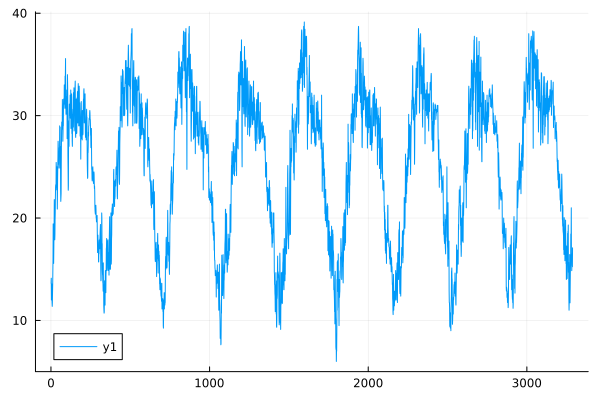

In [825]:
plot(X)

In [826]:
N=length(X)

3288

## Trend

In [827]:
@. model_trend(x,p)=p[1]+p[2]*x

model_trend (generic function with 1 method)

In [938]:
fits_trend=curve_fit(model_trend,1:N,X,[1.,0.])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([25.161203347180614, 5.6842075321836884e-5], [11.536260189255934, 11.036317031331258, 13.161373873406578, 12.01857357262476, 11.590058986128652, 12.911544399632543, 13.411601241707867, 13.786658083783188, 13.411714925858512, 12.411771767933832  …  6.999762425204395, 4.3476453542362385, 9.169130767740132, 8.847759038386883, 10.48417951682584, 9.681206055870861, 8.903485120168405, 9.222986406688168, 10.098043248763492, 8.257190999929723], [1.0000000000008662 1.0000000000235538; 1.0000000000008662 2.0000000000471077; … ; 1.0000000000008662 3286.9999999999777; 1.0000000000008662 3288.0000000000014], true, Float64[])

In [939]:
fits_trend.param

2-element Vector{Float64}:
 25.161203347180614
  5.6842075321836884e-5

In [940]:
ans[2]*365

0.02074735749247046

In [941]:
model_trend(N,fits.param)-model_trend(1,fits.param)

0.18683990158287855

In [942]:
Y=X .- model_trend.(1:N,Ref(fits_trend.param));

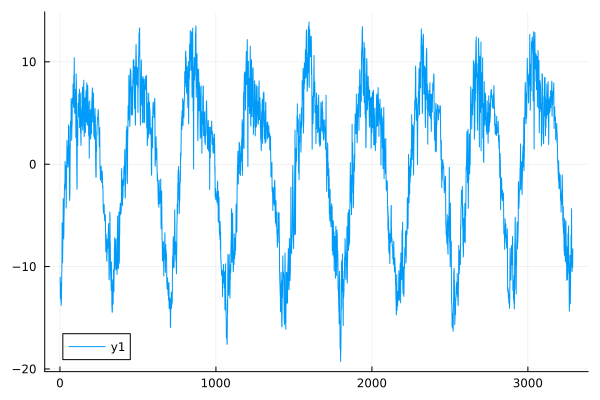

In [943]:
plot(Y)

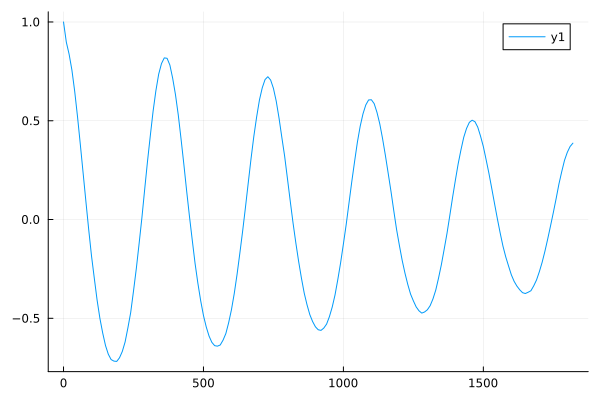

In [944]:
γ₀=γ(Y,0)
plot(0:10:365*5,h->γ(Y,h)/γ₀)

## Sezonowość

###### 1

In [1416]:
@. model_ses(x,p)=p[1]*sin(2π/p[2]*x+p[3])

model_ses (generic function with 1 method)

In [1417]:
fit_ses=curve_fit(model_ses,1:N,Y,[1.,365.,0.])

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([9.325083803494246, 365.0, -1.0716173679928707], [3.427114202096959, 3.007626762578113, 5.2155183972592205, 4.1579074175463795, 3.8169114371480672, 5.2282188081267815, 5.820374342869439, 6.289779321974311, 6.011405788052207, 5.110225125439384  …  -1.604047450937518, -4.192989522584623, 0.6942016646762941, 0.44104701347728437, 2.148175660275136, 1.4183805055274767, 0.7162863295692858, 1.1138404195291614, 2.0693529800103274, 0.31133552378232565], [-0.8696056955673375 0.0 4.60423058736915; -0.8609778140350218 0.0 4.743134038839068; … ; -0.8609778140192929 0.0 4.743134040618401; -0.8520948061758706 0.0 4.880631999215779], true, Float64[])

In [1418]:
fit_ses.param

3-element Vector{Float64}:
   9.325083803494246
 365.0
  -1.0716173679928707

In [1419]:
W=Y.-model_ses.(1:N,Ref(fit_ses.param));

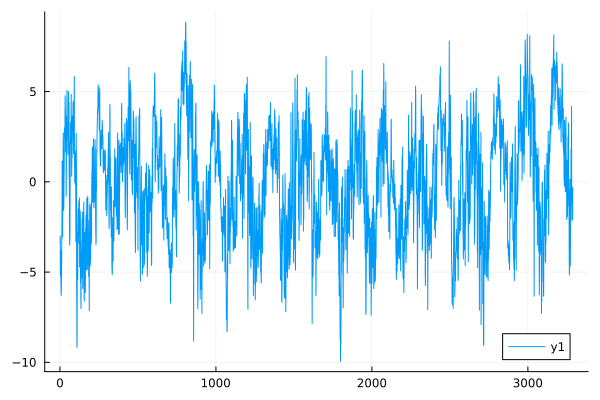

In [1420]:
plot(W)

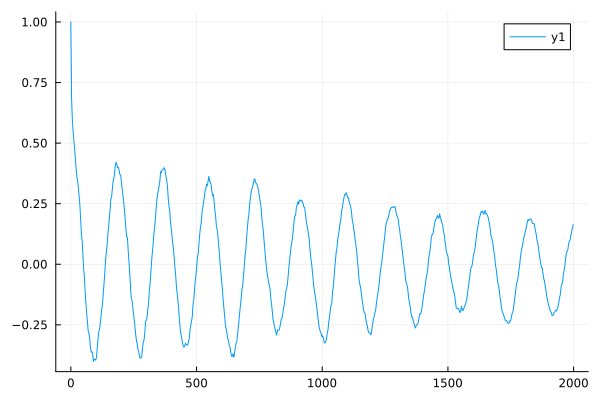

In [1421]:
γ₀=γ(W,0)
plot(0:3:2000,h->γ(W,h)/γ₀)

In [1119]:
γ₀=γ(W,0)
anim=@animate for i in 1:10
    plot(0:3:2000,h->γ(temp!(W,model_ses,fit_ses.param),h)/γ₀, title="$i")
end

Animation("C:\\Users\\Kacper\\AppData\\Local\\Temp\\jl_KZjwTB", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"])

###### 2

In [1128]:
temp=zeros(100,length(Y));

In [1146]:
temp[1,:]=Y
for i in 2:100
    fit_ses=curve_fit(model_ses,1:N,temp[i-1,:],[1.,365.,0.])
    temp[i,:]=temp[i-1,:].-model_ses.(1:N,Ref(fit_ses.param))
end

In [1147]:
anim=@animate for i in 36:38
    γ₀=γ(temp[i,:],0)
    plot(0:3:2000,h->γ(temp[i,:],h)/γ₀, title="$(i-1)")
end

Animation("C:\\Users\\Kacper\\AppData\\Local\\Temp\\jl_SyDKXi", ["000001.png", "000002.png", "000003.png"])

###### 3

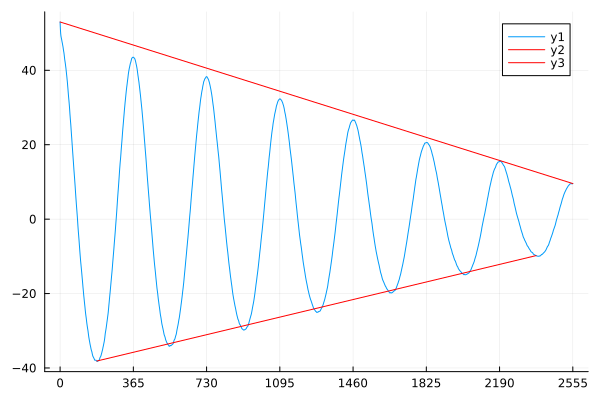

In [1700]:
plot(0:1:7*365,h->γ(Y,h))
plot!([0,7*365],[γ(Y,0),γ(Y,7*365)],c=:red)
plot!([183,7*365-183],[γ(Y,183),γ(Y,7*365-183)],c=:red)
plot!(xticks=[i*365 for i in 0:7])

In [1701]:
(γ(Y,7*365)-γ(Y,0))/(7*365),γ(Y,0)

(-0.016996999041300708, 52.98277224739827)

In [1707]:
(γ(Y,7*365-183)-γ(Y,183))/(6*365)

0.012935707672177756

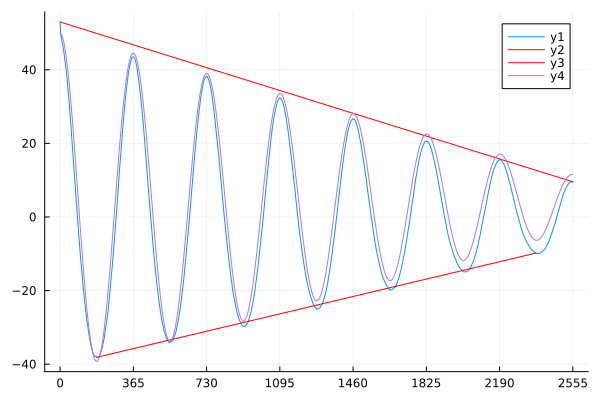

In [1727]:
plot(0:1:7*365,h->γ(Y,h))
plot!([0,7*365],[γ(Y,0),γ(Y,7*365)],c=:red)
plot!([183,7*365-183],[γ(Y,183),γ(Y,7*365-183)],c=:red)
plot!(xticks=[i*365 for i in 0:7])
plot!(h->model_ses(h,[-0.015,366.,π/2,46.,4]))

[-4.9361743166601856e-5, 366.3459730130054, 2.172577314620264, -9.266789928392592, -0.020844747566505735]

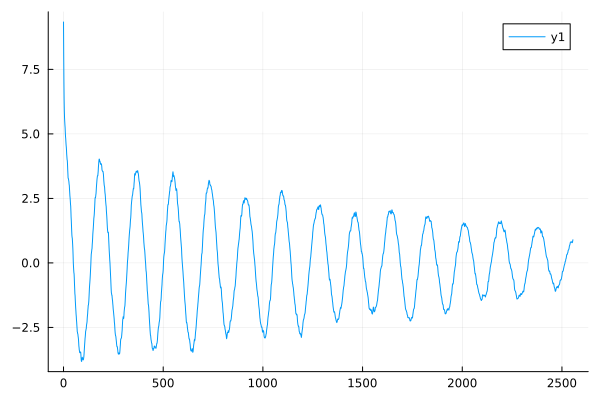

In [1728]:
@. model_ses(x,p)=(p[1]*x+p[4])*sin(2π/p[2]*x+p[3])+p[5]
fit_ses=curve_fit(model_ses,1:N,Y,[-0.017,365.,π/2,53.,3.])
print(fit_ses.param)
W=Y.-model_ses.(1:N,Ref(fit_ses.param));
plot(0:1:7*365,h->γ(W,h))

[1.0638938139464655, 366.30616896160313, 1.5852792628791066, 0.01320429937948623, 42.196739667259536]

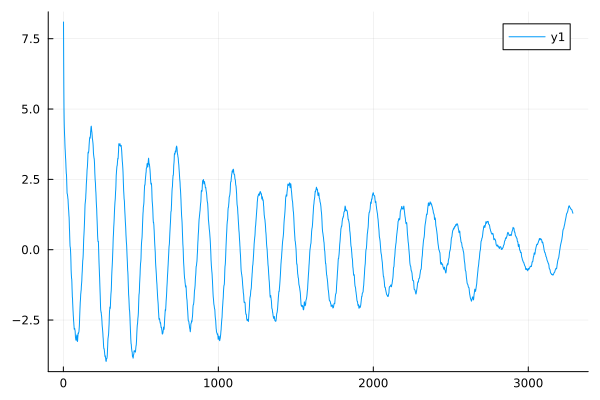

In [1698]:
@. model_ses(x,p)=p[1]*sin(2π/p[2]*x+p[3])*(p[5]-p[4]*x)
fit_ses=curve_fit(model_ses,1:N,γ.(Ref(Y),1:N),[1.,365.,2.,0.024,1.])
print(fit_ses.param)
W=Y.-model_ses.(1:N,Ref(fit_ses.param));
plot(γ.(Ref(Y),0:N-1).-model_ses.(0:N-1,Ref(fit_ses.param)))